# Bank Fears Loanliness

https://www.hackerearth.com/challenge/competitive/machine-learning-challenge-one/machine-learning/bank-fears-loanliness/

## Problem Statement

## Data Information

## Evaluation Metric

In [1]:
import os

In [2]:
os.listdir('.')

['data', '.git', 'bank_fears.ipynb', '.ipynb_checkpoints']

In [3]:
os.listdir('./data')

['submission.csv',
 'sample_submission.csv',
 'train_indessa.csv',
 'submission_mod.csv',
 'test_indessa.csv']

In [4]:
# import regular libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv('./data/train_indessa.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
member_id                      532428 non-null int64
loan_amnt                      532428 non-null int64
funded_amnt                    532428 non-null int64
funded_amnt_inv                532428 non-null float64
term                           532428 non-null object
batch_enrolled                 447279 non-null object
int_rate                       532428 non-null float64
grade                          532428 non-null object
sub_grade                      532428 non-null object
emp_title                      501598 non-null object
emp_length                     532428 non-null object
home_ownership                 532428 non-null object
annual_inc                     532425 non-null float64
verification_status            532428 non-null object
pymnt_plan                     532428 non-null object
desc                           75599 non-null object
purpose                   

In [7]:
train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30830
emp_length                          0
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [8]:
len(train)

532428

In [9]:
# percent missing
round(train.isnull().sum()/len(train),3)*100

member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
term                            0.0
batch_enrolled                 16.0
int_rate                        0.0
grade                           0.0
sub_grade                       0.0
emp_title                       5.8
emp_length                      0.0
home_ownership                  0.0
annual_inc                      0.0
verification_status             0.0
pymnt_plan                      0.0
desc                           85.8
purpose                         0.0
title                           0.0
zip_code                        0.0
addr_state                      0.0
dti                             0.0
delinq_2yrs                     0.0
inq_last_6mths                  0.0
mths_since_last_delinq         51.2
mths_since_last_record         84.6
open_acc                        0.0
pub_rec                         0.0
revol_bal                   

In [10]:
train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [11]:
# columns with missing data
train.columns[train.isnull().sum()>0]

Index(['batch_enrolled', 'emp_title', 'annual_inc', 'desc', 'title',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [12]:
train.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,...,0.0,NaN,INDIVIDUAL,NaN,113th week,0.0,0.0,350619.0,29500.0,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,...,0.0,NaN,INDIVIDUAL,NaN,117th week,0.0,1023.0,13272.0,55500.0,1
7,23043116,6000,6000,6000.0,36 months,NaN,9.17,B,B1,Banker,...,0.0,54.0,INDIVIDUAL,NaN,78th week,0.0,0.0,272579.0,11800.0,0
8,45900933,6000,6000,6000.0,36 months,BAT4136152,13.99,C,C4,LVN,...,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,281521.0,62100.0,0
9,41272507,34550,34550,34550.0,60 months,BAT4694572,17.14,D,D4,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,52th week,0.0,0.0,76034.0,33200.0,0


In [13]:
# exploratory phase
features_to_be_dropped = ['batch_enrolled','emp_title', 'desc', 'title', 'zip_code', 'mths_since_last_delinq',
                          'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint']
features_to_be_imputed = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 
                          'revol_util','total_acc', 'collections_12_mths_ex_med','acc_now_delinq', 
                          'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

In [14]:
selected_columns = []
for col in train.columns:
    if col in features_to_be_dropped:
        pass
    elif col == 'loan_status':
        pass
    else:
        selected_columns.append(col)

len_selected_columns = len(selected_columns)
print('num of selected cols:',len_selected_columns)

for col in selected_columns:
    print(col)


num of selected cols: 35
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
grade
sub_grade
emp_length
home_ownership
annual_inc
verification_status
pymnt_plan
purpose
addr_state
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
collections_12_mths_ex_med
application_type
last_week_pay
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim


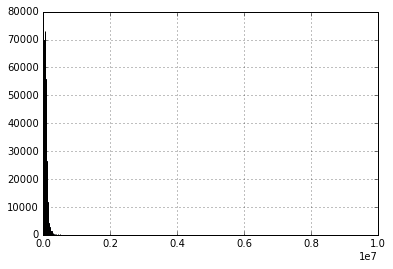

In [15]:
#train['annual_inc']
train['annual_inc'].hist(bins=1000)

In [16]:
train[train['annual_inc'].isnull()][selected_columns[0:20]]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec
170053,70735,6500,6500,0.0,36 months,8.38,A,A5,< 1 year,NONE,NaN,Not Verified,n,other,NY,4.0,NaN,NaN,NaN,NaN
198875,79906,7000,7000,3450.0,36 months,7.75,A,A3,< 1 year,NONE,NaN,Not Verified,n,other,NY,1.0,NaN,NaN,NaN,NaN
402854,79878,6700,6700,6700.0,36 months,7.75,A,A3,< 1 year,NONE,NaN,Not Verified,n,other,NY,1.0,NaN,NaN,NaN,NaN


In [17]:
train[train['annual_inc'].isnull()][selected_columns[21:]]

,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
170053,NaN,NaN,f,873.83,0.0,0.0,0.0,NaN,INDIVIDUAL,157th week,NaN,NaN,NaN,NaN
198875,NaN,NaN,f,867.53,0.0,0.0,0.0,NaN,INDIVIDUAL,157th week,NaN,NaN,NaN,NaN
402854,NaN,NaN,f,830.42,0.0,0.0,0.0,NaN,INDIVIDUAL,157th week,NaN,NaN,NaN,NaN


In [18]:
train[0:10][selected_columns[0:20]]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec
0,58189336,14350,14350,14350.0,36 months,19.19,E,E3,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,FL,33.88,0.0,1.0,14.0,1.0
1,70011223,4800,4800,4800.0,36 months,10.99,B,B4,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,MD,3.64,0.0,1.0,6.0,0.0
2,70255675,10000,10000,10000.0,36 months,7.26,A,A4,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,OH,18.42,0.0,0.0,5.0,0.0
3,1893936,15000,15000,15000.0,36 months,19.72,D,D5,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,VA,14.97,0.0,2.0,10.0,0.0
4,7652106,16000,16000,16000.0,36 months,10.64,B,B2,10+ years,RENT,52000.0,Verified,n,credit_card,CA,20.16,0.0,0.0,11.0,0.0
5,10247268,15000,15000,14950.0,36 months,8.90,A,A5,2 years,MORTGAGE,120000.0,Not Verified,n,debt_consolidation,IN,12.30,0.0,0.0,18.0,0.0
6,8089625,5000,5000,4975.0,36 months,7.90,A,A4,5 years,RENT,75000.0,Source Verified,n,debt_consolidation,CA,5.70,0.0,0.0,13.0,2.0
7,23043116,6000,6000,6000.0,36 months,9.17,B,B1,8 years,MORTGAGE,54000.0,Not Verified,n,credit_card,AL,11.63,0.0,1.0,13.0,0.0
8,45900933,6000,6000,6000.0,36 months,13.99,C,C4,7 years,MORTGAGE,92000.0,Not Verified,n,home_improvement,CA,30.85,0.0,0.0,16.0,0.0
9,41272507,34550,34550,34550.0,60 months,17.14,D,D4,2 years,MORTGAGE,72000.0,Verified,n,debt_consolidation,KY,33.92,0.0,0.0,12.0,0.0


In [19]:
train[0:10][selected_columns[21:]]

,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0
1,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0
2,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0
3,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0
4,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0
5,64.5,30.0,f,1957.24,0.0,0.0,0.0,0.0,INDIVIDUAL,113th week,0.0,0.0,350619.0,29500.0
6,23.9,23.0,f,578.36,0.0,0.0,0.0,0.0,INDIVIDUAL,117th week,0.0,1023.0,13272.0,55500.0
7,29.5,49.0,f,637.51,0.0,0.0,0.0,0.0,INDIVIDUAL,78th week,0.0,0.0,272579.0,11800.0
8,76.6,27.0,w,621.72,0.0,0.0,0.0,0.0,INDIVIDUAL,44th week,0.0,0.0,281521.0,62100.0
9,90.5,30.0,w,5535.46,0.0,0.0,0.0,0.0,INDIVIDUAL,52th week,0.0,0.0,76034.0,33200.0


In [20]:
train[0:10]['loan_status']

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: loan_status, dtype: int64

In [21]:
train[train['delinq_2yrs'].isnull()][selected_columns[0:20]]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec
152427,70473,4350,4350,825.0,36 months,8.07,A,A4,< 1 year,RENT,120000.0,Not Verified,n,other,MA,4.00,NaN,NaN,NaN,NaN
158498,85667,1000,1000,625.0,36 months,14.07,E,E3,10+ years,RENT,25000.0,Not Verified,n,other,NJ,16.27,NaN,NaN,NaN,NaN
170053,70735,6500,6500,0.0,36 months,8.38,A,A5,< 1 year,NONE,NaN,Not Verified,n,other,NY,4.00,NaN,NaN,NaN,NaN
198875,79906,7000,7000,3450.0,36 months,7.75,A,A3,< 1 year,NONE,NaN,Not Verified,n,other,NY,1.00,NaN,NaN,NaN,NaN
206905,72816,7200,5075,350.0,36 months,10.28,C,C1,< 1 year,RENT,95000.0,Not Verified,n,other,NY,10.00,NaN,NaN,NaN,NaN
212464,76623,1275,1275,0.0,36 months,12.49,D,D3,1 year,RENT,40000.0,Not Verified,n,other,MA,10.00,NaN,NaN,NaN,NaN
283835,72992,1000,1000,0.0,36 months,9.64,B,B4,< 1 year,RENT,12000.0,Not Verified,n,other,MA,10.00,NaN,NaN,NaN,NaN
325674,74301,6500,6500,0.0,36 months,9.64,B,B4,< 1 year,RENT,20000.0,Not Verified,n,other,CT,10.00,NaN,NaN,NaN,NaN
337233,83471,2600,2600,575.0,36 months,8.38,A,A5,3 years,MORTGAGE,6500.0,Not Verified,n,other,CO,6.46,NaN,NaN,NaN,NaN
392373,85923,1200,1200,500.0,36 months,9.01,B,B2,< 1 year,RENT,36000.0,Not Verified,n,other,TX,3.27,NaN,NaN,NaN,NaN


In [22]:
train[train['delinq_2yrs'].isnull()][selected_columns[21:]]

,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
152427,NaN,NaN,f,561.68,0.00,0.00,0.0000,NaN,INDIVIDUAL,157th week,NaN,NaN,NaN,NaN
158498,NaN,NaN,f,231.38,0.00,0.00,0.0000,NaN,INDIVIDUAL,157th week,NaN,NaN,NaN,NaN
170053,NaN,NaN,f,873.83,0.00,0.00,0.0000,NaN,INDIVIDUAL,157th week,NaN,NaN,NaN,NaN
198875,NaN,NaN,f,867.53,0.00,0.00,0.0000,NaN,INDIVIDUAL,157th week,NaN,NaN,NaN,NaN
206905,NaN,NaN,f,843.33,0.00,0.00,0.0000,NaN,INDIVIDUAL,157th week,NaN,NaN,NaN,NaN
212464,NaN,NaN,f,128.57,0.00,872.89,305.5105,NaN,INDIVIDUAL,48th week,NaN,NaN,NaN,NaN
283835,NaN,NaN,f,155.53,0.00,0.00,0.0000,NaN,INDIVIDUAL,157th week,NaN,NaN,NaN,NaN
325674,NaN,NaN,f,503.81,0.00,4897.92,1714.2700,NaN,INDIVIDUAL,48th week,NaN,NaN,NaN,NaN
337233,NaN,NaN,f,329.05,21.64,28.63,0.3400,NaN,INDIVIDUAL,143th week,NaN,NaN,NaN,NaN
392373,NaN,NaN,f,173.88,0.00,0.00,0.0000,NaN,INDIVIDUAL,161th week,NaN,NaN,NaN,NaN


In [23]:
train[train['delinq_2yrs'].isnull()]['loan_status']

152427    1
158498    1
170053    1
198875    1
206905    1
212464    0
283835    1
325674    0
337233    0
392373    1
402854    1
439078    1
517442    1
520594    1
524397    1
531220    1
Name: loan_status, dtype: int64

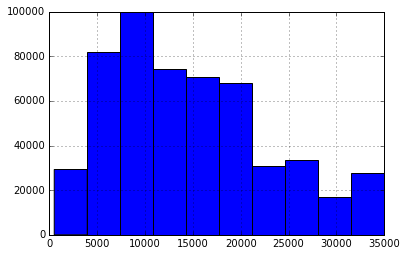

In [24]:
train['loan_amnt'].hist(bins=10)

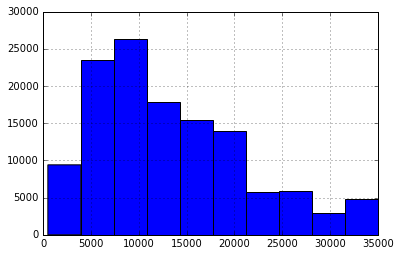

In [25]:
train[train['loan_status']==1]['loan_amnt'].hist(bins=10)

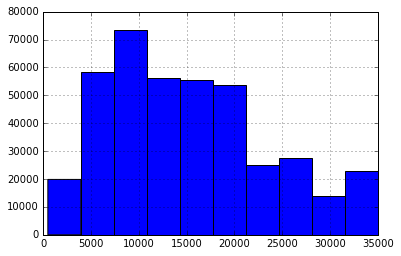

In [26]:
train[train['loan_status']==0]['loan_amnt'].hist(bins=10)

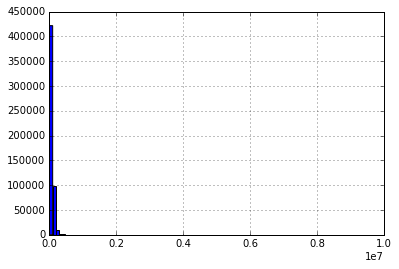

In [27]:
train['annual_inc'].hist(bins=100)

In [28]:
max(train['annual_inc'])

9500000.0

In [29]:
train[train['annual_inc']>9000000][selected_columns[0:20]]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec
183771,57607924,24000,24000,24000.0,60 months,7.89,A,A5,10+ years,MORTGAGE,9500000.0,Source Verified,n,credit_card,CA,0.12,0.0,0.0,12.0,0.0


In [30]:
train[train['annual_inc']>9000000][selected_columns[21:]]

,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
183771,22.0,31.0,f,903.69,0.0,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,256653.0,84200.0


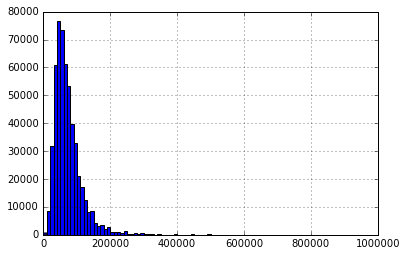

In [31]:
train[train['annual_inc']<1000000]['annual_inc'].hist(bins=100)

In [32]:
train[train['annual_inc']>500000]['loan_status'].sum()

143

In [33]:
train[train['annual_inc']>500000]['loan_status'].count()

617

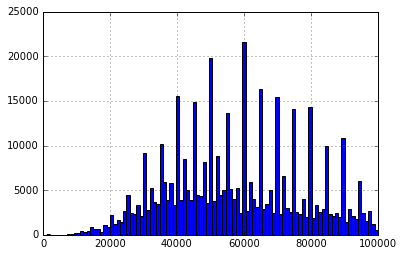

In [34]:
train[train['annual_inc']<100000]['annual_inc'].hist(bins=100)

In [35]:
#selectetd_cols
selected_columns

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'application_type',
 'last_week_pay',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [36]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        3
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      16
inq_last_6mths                   16
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

In [37]:
train[selected_columns].dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
total_rec_int                 float64
total_rec_late_fee            float64
recoveries  

In [38]:
# fill annual_inc with mean
mean_annual_inc = train['annual_inc'].mean()
train['annual_inc'].fillna(mean_annual_inc, inplace=True)

In [39]:
mean_annual_inc

75029.84328906404

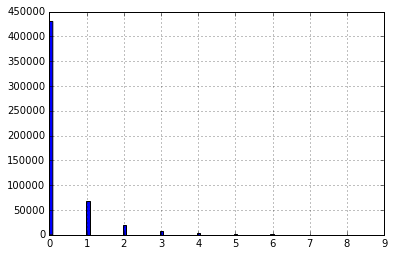

In [40]:
# plot delinq_2yrs data
train[train['delinq_2yrs']<10]['delinq_2yrs'].hist(bins=100)

In [41]:
# fill delinq_2yrs with 0
train['delinq_2yrs'].fillna(0, inplace=True)

In [42]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                   16
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

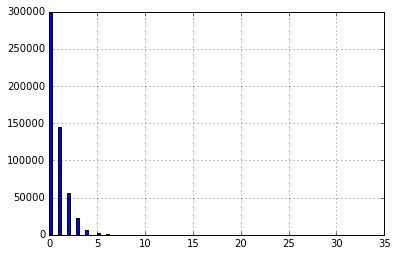

In [43]:
# plot inq_last_6mths data
train['inq_last_6mths'].hist(bins=100)

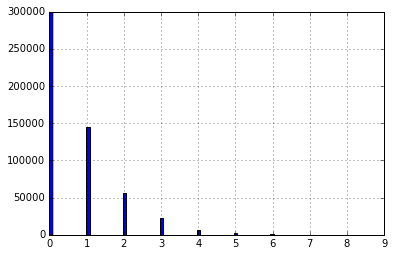

In [44]:
train[train['inq_last_6mths']<10]['inq_last_6mths'].hist(bins=100)

In [45]:
# fill inq_last_6mths with 0
train['inq_last_6mths'].fillna(0, inplace=True)

In [46]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                         16
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

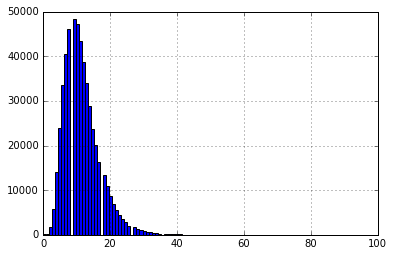

In [47]:
# plot open_acc data
train['open_acc'].hist(bins=100)

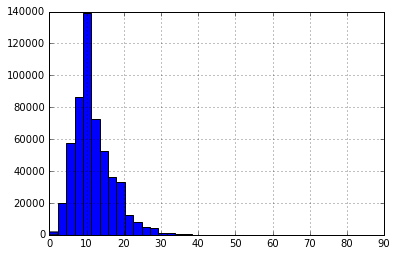

In [48]:
train['open_acc'].hist(bins=40)

In [49]:
train['open_acc'].value_counts()

9.0     48345
10.0    47212
8.0     46065
11.0    43384
7.0     40501
12.0    38666
13.0    33986
6.0     33532
14.0    28771
5.0     23935
15.0    23733
16.0    20072
17.0    16360
4.0     13991
18.0    13336
19.0    10927
20.0     8679
21.0     6917
3.0      5741
22.0     5562
23.0     4490
24.0     3510
25.0     2851
26.0     2054
2.0      1654
27.0     1650
28.0     1277
29.0     1026
30.0      794
31.0      618
        ...  
45.0       30
44.0       27
48.0       25
46.0       23
49.0       16
47.0       15
50.0       13
51.0       11
53.0       10
55.0        5
0.0         4
58.0        3
52.0        3
54.0        2
59.0        2
84.0        1
68.0        1
82.0        1
79.0        1
76.0        1
75.0        1
70.0        1
63.0        1
67.0        1
64.0        1
62.0        1
60.0        1
57.0        1
56.0        1
90.0        1
Name: open_acc, dtype: int64

In [50]:
train['open_acc'].mode()[0]

9.0

In [51]:
# fill open_acc with mode
train['open_acc'].fillna(train['open_acc'].mode()[0], inplace=True)

In [52]:
train['open_acc'].isnull().sum()

0

In [53]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                          16
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

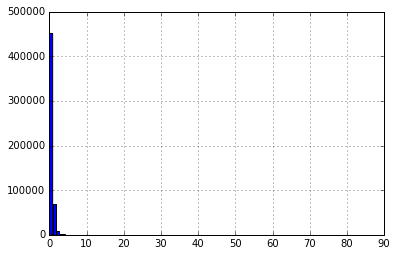

In [54]:
# plot pub_rec data
train['pub_rec'].hist(bins=100)

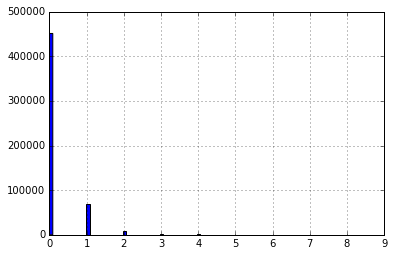

In [55]:
train[train['pub_rec']<10]['pub_rec'].hist(bins=100)

In [56]:
# fill pub_rec with 0
train['pub_rec'].fillna(0, inplace=True)

In [57]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      287
total_acc                        16
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

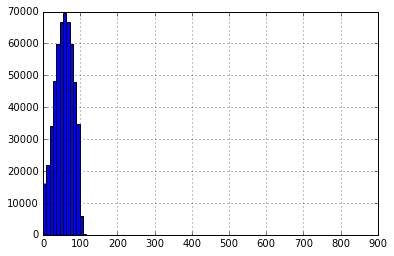

In [58]:
# plot revol_util data
train['revol_util'].hist(bins=100)

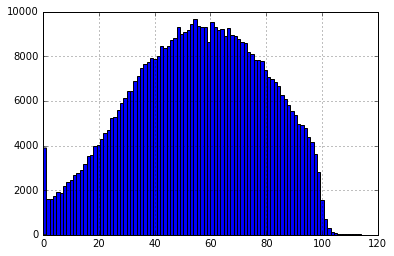

In [59]:
train[train['revol_util']<120]['revol_util'].hist(bins=100)

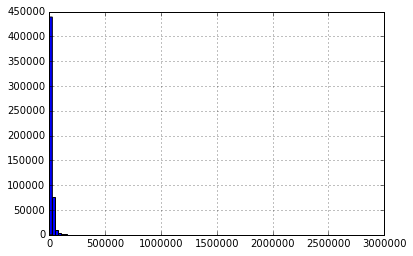

In [60]:
# plot revol_bal data
train['revol_bal'].hist(bins=100)

In [61]:
train[train['revol_util'].isnull()][['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate',
                                     'dti','open_acc','revol_bal','revol_util','total_acc','total_rec_int',
                                     'tot_cur_bal', 'loan_status']]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,dti,open_acc,revol_bal,revol_util,total_acc,total_rec_int,tot_cur_bal,loan_status
92,1500,1500,1500.000000,36 months,14.64,15.54,3.0,0.0,NaN,20.0,0.00,24895.0,0
868,10000,10000,10000.000000,36 months,19.99,4.79,3.0,0.0,NaN,21.0,1882.24,39954.0,1
1753,7000,7000,6975.000000,60 months,18.67,4.62,5.0,0.0,NaN,12.0,0.00,NaN,0
4249,1000,1000,1000.000000,36 months,19.03,21.85,2.0,0.0,NaN,4.0,263.73,NaN,0
8531,7000,7000,6950.000000,36 months,12.99,28.64,2.0,0.0,NaN,32.0,1360.88,168552.0,0
9302,7000,7000,7000.000000,36 months,12.49,4.85,3.0,0.0,NaN,17.0,954.16,249659.0,0
11325,8000,8000,8000.000000,36 months,17.57,18.18,5.0,0.0,NaN,17.0,953.45,68501.0,0
16180,12000,12000,12000.000000,36 months,13.33,20.10,5.0,46139.0,NaN,16.0,639.78,77661.0,0
19619,8500,8500,8500.000000,36 months,8.67,12.29,4.0,0.0,NaN,12.0,670.03,356907.0,0
22047,35000,35000,35000.000000,36 months,16.29,11.13,5.0,35314.0,NaN,19.0,7118.79,386060.0,0


In [62]:
train[train['revol_util'].isnull()][selected_columns[0:20]]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec
92,15349020,1500,1500,1500.000000,36 months,14.64,C,C3,2 years,RENT,40000.0,Source Verified,n,debt_consolidation,WA,15.54,0.0,0.0,3.0,0.0
868,17332100,10000,10000,10000.000000,36 months,19.99,E,E1,< 1 year,RENT,50000.0,Verified,n,other,CA,4.79,1.0,2.0,3.0,0.0
1753,690565,7000,7000,6975.000000,60 months,18.67,F,F2,4 years,RENT,27000.0,Source Verified,n,other,DE,4.62,0.0,1.0,5.0,0.0
4249,1310923,1000,1000,1000.000000,36 months,19.03,E,E2,n/a,OWN,31800.0,Not Verified,n,other,HI,21.85,0.0,0.0,2.0,0.0
8531,2347006,7000,7000,6950.000000,36 months,12.99,B,B4,10+ years,MORTGAGE,61000.0,Verified,n,credit_card,WV,28.64,2.0,0.0,2.0,0.0
9302,27829466,7000,7000,7000.000000,36 months,12.49,B,B5,8 years,OWN,156000.0,Source Verified,n,car,NV,4.85,1.0,0.0,3.0,0.0
11325,47336838,8000,8000,8000.000000,36 months,17.57,D,D4,8 years,RENT,115000.0,Source Verified,n,debt_consolidation,NV,18.18,1.0,0.0,5.0,0.0
16180,58639359,12000,12000,12000.000000,36 months,13.33,C,C3,10+ years,MORTGAGE,60000.0,Source Verified,n,debt_consolidation,PA,20.10,0.0,1.0,5.0,0.0
19619,38790480,8500,8500,8500.000000,36 months,8.67,B,B1,2 years,MORTGAGE,75000.0,Not Verified,n,credit_card,CA,12.29,3.0,0.0,4.0,0.0
22047,17704000,35000,35000,35000.000000,36 months,16.29,D,D2,10+ years,MORTGAGE,275000.0,Verified,n,other,TN,11.13,0.0,0.0,5.0,0.0


In [63]:
train[train['revol_util'].isnull()][selected_columns[21:]]

,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
92,NaN,20.0,w,0.00,0.000000,0.00,0.0000,0.0,INDIVIDUAL,NAth week,0.0,0.0,24895.0,0.0
868,NaN,21.0,w,1882.24,0.000000,0.00,0.0000,0.0,INDIVIDUAL,61th week,0.0,0.0,39954.0,0.0
1753,NaN,12.0,f,0.00,0.000000,1978.88,692.5900,0.0,INDIVIDUAL,NAth week,0.0,NaN,NaN,NaN
4249,NaN,4.0,f,263.73,0.000000,70.07,0.7007,0.0,INDIVIDUAL,96th week,0.0,NaN,NaN,NaN
8531,NaN,32.0,f,1360.88,0.000000,0.00,0.0000,0.0,INDIVIDUAL,113th week,0.0,0.0,168552.0,0.0
9302,NaN,17.0,f,954.16,0.000000,0.00,0.0000,0.0,INDIVIDUAL,70th week,0.0,0.0,249659.0,0.0
11325,NaN,17.0,f,953.45,0.000000,0.00,0.0000,0.0,INDIVIDUAL,39th week,0.0,0.0,68501.0,0.0
16180,NaN,16.0,f,639.78,0.000000,0.00,0.0000,0.0,INDIVIDUAL,22th week,0.0,0.0,77661.0,46000.0
19619,NaN,12.0,f,670.03,0.000000,0.00,0.0000,0.0,INDIVIDUAL,57th week,0.0,0.0,356907.0,0.0
22047,NaN,19.0,w,7118.79,0.000000,0.00,0.0000,0.0,INDIVIDUAL,83th week,0.0,17478.0,386060.0,34000.0


In [64]:
# fill revol_util with 0
train['revol_util'].fillna(0, inplace=True)

In [65]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                        16
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

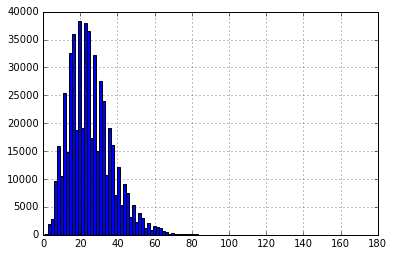

In [66]:
# plot total_acc data
train['total_acc'].hist(bins=100)

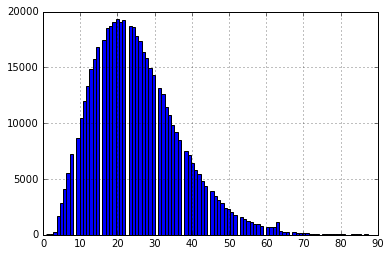

In [67]:
train[train['total_acc']<90]['total_acc'].hist(bins=100)

In [68]:
train[train['total_acc']>train['open_acc']][['open_acc','total_acc','loan_status']].count()

open_acc       525981
total_acc      525981
loan_status    525981
dtype: int64

In [69]:
train[train['total_acc']<train['open_acc']][['open_acc','total_acc','loan_status']].count()

open_acc       2
total_acc      2
loan_status    2
dtype: int64

In [70]:
train[train['total_acc']==train['open_acc']][['open_acc','total_acc','loan_status']].count()

open_acc       6429
total_acc      6429
loan_status    6429
dtype: int64

In [71]:
train['total_acc'].mode()[0]

20.0

In [72]:
# fill total_acc with mode
train['total_acc'].fillna(train['total_acc'].mode()[0], inplace=True)

In [73]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

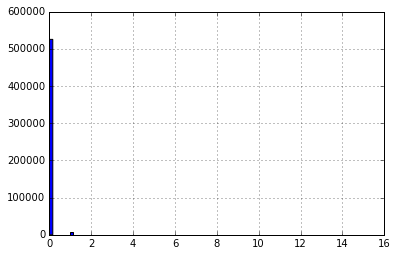

In [74]:
# plot collections_12_mths_ex_med data
train['collections_12_mths_ex_med'].hist(bins=100)

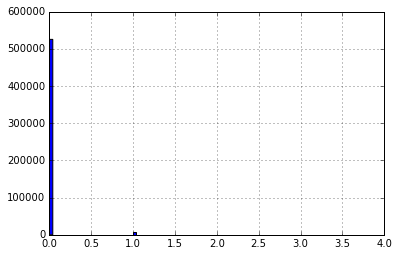

In [75]:
train[train['collections_12_mths_ex_med']<5]['collections_12_mths_ex_med'].hist(bins=100)

In [76]:
train['collections_12_mths_ex_med'].value_counts()

0.0     525346
1.0       6494
2.0        416
3.0         53
4.0         15
5.0          6
16.0         1
14.0         1
7.0          1
Name: collections_12_mths_ex_med, dtype: int64

In [77]:
train['collections_12_mths_ex_med'].mode()

0    0.0
dtype: float64

In [78]:
# fill collections_12_mths_ex_med with mode
train['collections_12_mths_ex_med'].fillna(train['collections_12_mths_ex_med'].mode()[0], inplace=True)

In [79]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

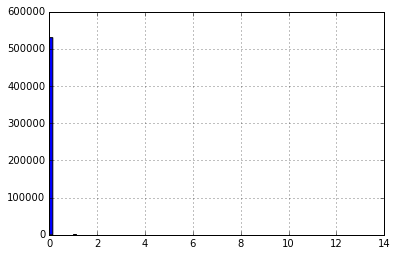

In [80]:
# plot acc_now_delinq data
train['acc_now_delinq'].hist(bins=100)

In [81]:
train['acc_now_delinq'].value_counts()

0.0     529949
1.0       2304
2.0        134
3.0         16
4.0          5
5.0          2
14.0         1
6.0          1
Name: acc_now_delinq, dtype: int64

In [82]:
train['acc_now_delinq'].mode()

0    0.0
dtype: float64

In [83]:
# fill acc_now_delinq with mode
train['acc_now_delinq'].fillna(train['acc_now_delinq'].mode()[0], inplace=True)

In [84]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

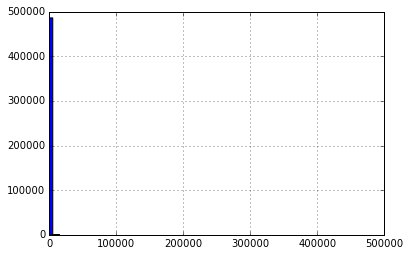

In [85]:
# plot tot_coll_amt data
train['tot_coll_amt'].hist(bins=100)

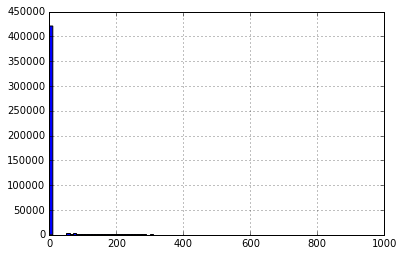

In [86]:
train[train['tot_coll_amt']<1000]['tot_coll_amt'].hist(bins=100)

In [87]:
train['tot_coll_amt'].value_counts()

0.0       420903
50.0        1053
100.0        815
75.0         631
150.0        418
200.0        409
60.0         392
80.0         374
70.0         349
55.0         327
65.0         309
90.0         298
85.0         274
250.0        273
54.0         242
66.0         235
125.0        231
95.0         226
58.0         226
79.0         226
67.0         225
71.0         222
99.0         217
78.0         215
81.0         215
53.0         214
63.0         213
72.0         211
86.0         210
84.0         208
           ...  
7587.0         1
7588.0         1
7469.0         1
7464.0         1
7463.0         1
7458.0         1
7389.0         1
7391.0         1
7394.0         1
7397.0         1
7401.0         1
7403.0         1
7404.0         1
7406.0         1
7407.0         1
7412.0         1
7417.0         1
7425.0         1
7432.0         1
7433.0         1
7434.0         1
7435.0         1
7436.0         1
7440.0         1
7442.0         1
7446.0         1
7448.0         1
7451.0        

In [88]:
# fill tot_coll_amt with mode
train['tot_coll_amt'].fillna(train['tot_coll_amt'].mode()[0], inplace=True)

In [89]:
train[train['tot_cur_bal'].isnull()][selected_columns[21:]]

,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
21,12.20,9.0,f,0.00,0.000000,712.76,7.0300,0.0,INDIVIDUAL,NAth week,0.0,0.0,NaN,NaN
47,80.00,19.0,f,4255.21,68.040000,750.11,134.7958,0.0,INDIVIDUAL,135th week,0.0,0.0,NaN,NaN
66,2.90,8.0,f,1438.43,0.000000,0.00,0.0000,0.0,INDIVIDUAL,117th week,0.0,0.0,NaN,NaN
67,80.10,47.0,f,11640.25,0.000000,0.00,0.0000,0.0,INDIVIDUAL,156th week,0.0,0.0,NaN,NaN
74,93.40,21.0,f,197.41,0.000000,0.00,0.0000,0.0,INDIVIDUAL,156th week,0.0,0.0,NaN,NaN
93,57.50,22.0,f,330.23,29.950575,318.09,3.2000,0.0,INDIVIDUAL,26th week,0.0,0.0,NaN,NaN
123,69.00,29.0,f,2576.60,0.000000,0.00,0.0000,0.0,INDIVIDUAL,152th week,0.0,0.0,NaN,NaN
130,58.70,19.0,f,2150.42,0.000000,0.00,0.0000,0.0,INDIVIDUAL,156th week,0.0,0.0,NaN,NaN
150,93.20,8.0,f,5769.41,0.000000,0.00,0.0000,0.0,INDIVIDUAL,161th week,0.0,0.0,NaN,NaN
152,88.70,14.0,f,2886.33,0.000000,0.00,0.0000,0.0,INDIVIDUAL,104th week,0.0,0.0,NaN,NaN


In [90]:
train[selected_columns].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

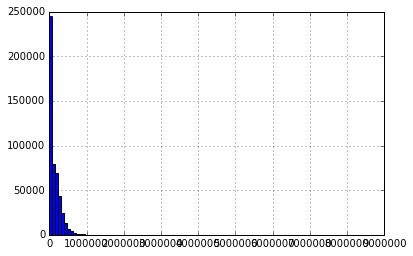

In [91]:
# plot tot_cur_bal data
train['tot_cur_bal'].hist(bins=100)

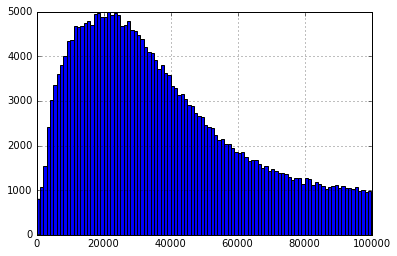

In [92]:
train[train['tot_cur_bal']<100000]['tot_cur_bal'].hist(bins=100)

In [93]:
train['tot_cur_bal'].mean()

139554.1107918862

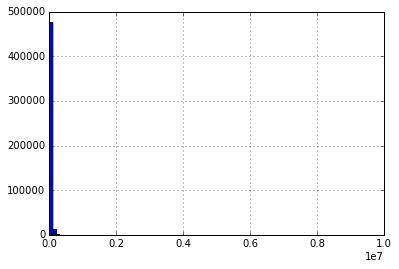

In [94]:
# plot total_rev_hi_lim data
train['total_rev_hi_lim'].hist(bins=100)

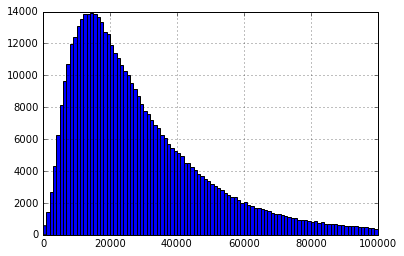

In [95]:
train[train['total_rev_hi_lim']<100000]['total_rev_hi_lim'].hist(bins=100)

In [96]:
# fill total_rev_hi_lim with 0
train['total_rev_hi_lim'].fillna(0, inplace=True)

In [97]:
# fill tot_cur_bal with 0
train['tot_cur_bal'].fillna(0, inplace=True)

In [98]:
train[selected_columns].isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_

In [99]:
train[selected_columns].dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
total_rec_int                 float64
total_rec_late_fee            float64
recoveries  

In [100]:
train['loan_status'].dtypes

dtype('int64')

In [101]:
object_cols = []
for col in selected_columns:
    col_type = train[col].dtypes
    if col_type == 'object':
        print(col, '\t', col_type)
        object_cols.append(col)

term 	 object
grade 	 object
sub_grade 	 object
emp_length 	 object
home_ownership 	 object
verification_status 	 object
pymnt_plan 	 object
purpose 	 object
addr_state 	 object
initial_list_status 	 object
application_type 	 object
last_week_pay 	 object


In [102]:
for c in object_cols:
    print(c, ": ", train[c].unique())
    print('\n')

term :  ['36 months' '60 months']


grade :  ['E' 'B' 'A' 'D' 'C' 'F' 'G']


sub_grade :  ['E3' 'B4' 'A4' 'D5' 'B2' 'A5' 'B1' 'C4' 'D4' 'C3' 'D2' 'A3' 'A1' 'C1' 'D1'
 'E2' 'B3' 'A2' 'C2' 'C5' 'E4' 'D3' 'B5' 'F2' 'F5' 'E1' 'E5' 'F4' 'F1' 'F3'
 'G4' 'G3' 'G5' 'G1' 'G2']


emp_length :  ['9 years' '< 1 year' '2 years' '10+ years' '5 years' '8 years' '7 years'
 '4 years' 'n/a' '1 year' '3 years' '6 years']


home_ownership :  ['OWN' 'MORTGAGE' 'RENT' 'OTHER' 'NONE' 'ANY']


verification_status :  ['Source Verified' 'Not Verified' 'Verified']


pymnt_plan :  ['n' 'y']


purpose :  ['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'major_purchase' 'small_business' 'vacation' 'car' 'moving' 'medical'
 'wedding' 'renewable_energy' 'house' 'educational']


addr_state :  ['FL' 'MD' 'OH' 'VA' 'CA' 'IN' 'AL' 'KY' 'NM' 'TN' 'TX' 'PA' 'KS' 'IL' 'NY'
 'MO' 'NC' 'NJ' 'CT' 'NH' 'MI' 'AZ' 'GA' 'UT' 'OK' 'NV' 'MN' 'VT' 'MA' 'DE'
 'LA' 'WA' 'AR' 'CO' 'WV' 'HI' 'WI' 'SD' 'NE' 'RI' 'WY' 'SC' '

In [103]:
# process categorical variables
from sklearn.preprocessing import LabelEncoder

le_dict = {}
for col in object_cols:
    print('col: ',col)
    le_dict[col] = LabelEncoder()
    train[col] = le_dict[col].fit_transform(train[col])
    le_dict[col].classes_ = np.append(le_dict[col].classes_, 'other')
    print('\t Done')


col:  term
	 Done
col:  grade
	 Done
col:  sub_grade
	 Done
col:  emp_length
	 Done
col:  home_ownership
	 Done
col:  verification_status
	 Done
col:  pymnt_plan
	 Done
col:  purpose
	 Done
col:  addr_state
	 Done
col:  initial_list_status
	 Done
col:  application_type
	 Done
col:  last_week_pay
	 Done


In [104]:
selected_columns[1:]

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'application_type',
 'last_week_pay',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [105]:
# split data into test and train
from sklearn.cross_validation import train_test_split
X = train[selected_columns[1:]]
labels = train['loan_status']
X_train, X_valid, y_train, y_valid = train_test_split(X,labels,test_size=0.3,random_state=37)

In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(372699, 34)
(372699,)
(159729, 34)
(159729,)


In [107]:
# implement Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [108]:
rf = RandomForestClassifier(n_estimators=100, verbose=5, n_jobs=-1)
rf.fit(X_train, y_train)

building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   18.0s


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=5,
            warm_start=False)

In [109]:
preds = rf.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, preds)
score = roc_auc_score(y_valid, preds)

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished


In [110]:
score

0.71152936424351931

In [111]:
fpr

array([ 0.        ,  0.01040437,  1.        ])

In [112]:
tpr

array([ 0.       ,  0.4334631,  1.       ])

In [113]:
thresholds

array([2, 1, 0])

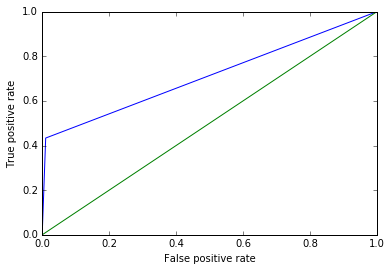

In [114]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [115]:
rf.feature_importances_

array([  2.90355439e-02,   2.89287237e-02,   3.21880847e-02,
         1.15015168e-02,   7.30740025e-02,   1.35579591e-02,
         4.23680066e-02,   2.30777627e-02,   8.14653753e-03,
         3.91364955e-02,   1.18844113e-02,   1.32640708e-06,
         1.43490011e-02,   3.18436814e-02,   4.98192901e-02,
         7.89800687e-03,   1.40535453e-02,   2.90985969e-02,
         6.09997724e-03,   4.17570044e-02,   4.32053451e-02,
         3.62498302e-02,   2.13761107e-02,   6.13549585e-02,
         1.83564070e-03,   1.72229862e-02,   1.15663359e-02,
         7.84862606e-04,   6.92265038e-06,   7.83171055e-02,
         4.38402362e-04,   9.38500186e-03,   1.00560799e-01,
         1.09876225e-01])

In [116]:
for idx in range(rf.n_features_):
    print(X_train.columns[idx],'\t',rf.feature_importances_[idx])

loan_amnt 	 0.0290355439349
funded_amnt 	 0.0289287236503
funded_amnt_inv 	 0.032188084656
term 	 0.011501516847
int_rate 	 0.0730740025058
grade 	 0.0135579590611
sub_grade 	 0.0423680066474
emp_length 	 0.0230777627164
home_ownership 	 0.00814653752876
annual_inc 	 0.0391364955405
verification_status 	 0.0118844112916
pymnt_plan 	 1.32640707529e-06
purpose 	 0.014349001051
addr_state 	 0.0318436814256
dti 	 0.0498192900801
delinq_2yrs 	 0.00789800687493
inq_last_6mths 	 0.0140535452659
open_acc 	 0.0290985969474
pub_rec 	 0.0060999772449
revol_bal 	 0.0417570043536
revol_util 	 0.043205345068
total_acc 	 0.0362498302139
initial_list_status 	 0.0213761106859
total_rec_int 	 0.0613549584673
total_rec_late_fee 	 0.00183564069876
recoveries 	 0.0172229861612
collection_recovery_fee 	 0.0115663358508
collections_12_mths_ex_med 	 0.000784862606084
application_type 	 6.92265037925e-06
last_week_pay 	 0.0783171055224
acc_now_delinq 	 0.000438402362125
tot_coll_amt 	 0.00938500185626
tot_cur_

In [117]:
rf.n_features_

34

In [118]:
# Predict test

In [119]:
test = pd.read_csv('./data/test_indessa.csv')

In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
member_id                      354951 non-null int64
loan_amnt                      354951 non-null int64
funded_amnt                    354951 non-null int64
funded_amnt_inv                354951 non-null float64
term                           354951 non-null object
batch_enrolled                 309352 non-null object
int_rate                       354951 non-null float64
grade                          354951 non-null object
sub_grade                      354951 non-null object
emp_title                      334324 non-null object
emp_length                     354951 non-null object
home_ownership                 354951 non-null object
annual_inc                     354950 non-null float64
verification_status            354951 non-null object
pymnt_plan                     354951 non-null object
desc                           50182 non-null object
purpose                   

In [121]:
test.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20627
emp_length                          0
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304769
purpose                             0
title                              61
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

In [122]:
test[selected_columns[0:len_selected_columns]].isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        1
verification_status               0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      13
inq_last_6mths                   13
open_acc                         13
pub_rec                          13
revol_bal                         0
revol_util                      215
total_acc                        13
initial_list_status               0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

In [123]:
#use similar logic used for train dataset to fill missing values

In [124]:
# columns with misssing values in test dataset
missing_cols = ['annual_inc','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_util','total_acc',
                'collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [125]:
# logic used for filling missing values in train dataset
# 
# annual_inc : train['annual_inc'].fillna(mean_annual_inc, inplace=True)
# delinq_2yrs : train['delinq_2yrs'].fillna(0, inplace=True)
# inq_last_6mths : train['inq_last_6mths'].fillna(0, inplace=True)
# open_acc : train['open_acc'].fillna(train['open_acc'].mode()[0], inplace=True)
# pub_rec : train['pub_rec'].fillna(0, inplace=True)
# revol_util : train['revol_util'].fillna(0, inplace=True)
# total_acc : train['total_acc'].fillna(train['total_acc'].mode()[0], inplace=True)
# collections_12_mths_ex_med : train['collections_12_mths_ex_med'].fillna(train['collections_12_mths_ex_med'].mode()[0], inplace=True)
# acc_now_delinq : train['acc_now_delinq'].fillna(train['acc_now_delinq'].mode()[0], inplace=True)
# tot_coll_amt : train['tot_coll_amt'].fillna(train['tot_coll_amt'].mode()[0], inplace=True)
# tot_cur_bal : train['tot_cur_bal'].fillna(0, inplace=True)
# total_rev_hi_lim : train['total_rev_hi_lim'].fillna(0, inplace=True)

In [126]:
# annual_inc : 
test['annual_inc'].fillna(mean_annual_inc, inplace=True)

In [127]:
# delinq_2yrs : 
test['delinq_2yrs'].fillna(0, inplace=True)

In [128]:
# inq_last_6mths : 
test['inq_last_6mths'].fillna(0, inplace=True)

In [129]:
# open_acc : 
test['open_acc'].fillna(train['open_acc'].mode()[0], inplace=True)

In [130]:
# pub_rec : 
test['pub_rec'].fillna(0, inplace=True)

In [131]:
# revol_util : 
test['revol_util'].fillna(0, inplace=True)

In [132]:
# total_acc : 
test['total_acc'].fillna(train['total_acc'].mode()[0], inplace=True)

In [133]:
# collections_12_mths_ex_med : 
test['collections_12_mths_ex_med'].fillna(train['collections_12_mths_ex_med'].mode()[0], inplace=True)

In [134]:
# acc_now_delinq : 
test['acc_now_delinq'].fillna(train['acc_now_delinq'].mode()[0], inplace=True)

In [135]:
# tot_coll_amt : 
test['tot_coll_amt'].fillna(train['tot_coll_amt'].mode()[0], inplace=True)

In [136]:
# tot_cur_bal : 
test['tot_cur_bal'].fillna(0, inplace=True)

In [137]:
# total_rev_hi_lim : 
test['total_rev_hi_lim'].fillna(0, inplace=True)

In [138]:
test[selected_columns[0:36]].isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_

In [139]:
le_dict

{'addr_state': LabelEncoder(),
 'application_type': LabelEncoder(),
 'emp_length': LabelEncoder(),
 'grade': LabelEncoder(),
 'home_ownership': LabelEncoder(),
 'initial_list_status': LabelEncoder(),
 'last_week_pay': LabelEncoder(),
 'purpose': LabelEncoder(),
 'pymnt_plan': LabelEncoder(),
 'sub_grade': LabelEncoder(),
 'term': LabelEncoder(),
 'verification_status': LabelEncoder()}

In [140]:
for col in test.columns:
    if test[col].dtypes=='object':
        print(col)

term
batch_enrolled
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
pymnt_plan
desc
purpose
title
zip_code
addr_state
initial_list_status
application_type
verification_status_joint
last_week_pay


In [141]:
selected_columns[1:36]

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'application_type',
 'last_week_pay',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [142]:
member_ids = test['member_id']
test=test[selected_columns[1:36]]

In [143]:
for col in test.columns:
    if test[col].dtypes=='object':
        print(col)

term
grade
sub_grade
emp_length
home_ownership
verification_status
pymnt_plan
purpose
addr_state
initial_list_status
application_type
last_week_pay


In [144]:
len_selected_columns

35

In [145]:
len(test.columns)

34

In [146]:
len(X_train.columns)

34

In [147]:
for col in object_cols:
    print('col: ',col)
    test[col] = le_dict[col].transform(test[col])
    print('\t Done')

col:  term
	 Done
col:  grade
	 Done
col:  sub_grade
	 Done
col:  emp_length
	 Done
col:  home_ownership
	 Done
col:  verification_status
	 Done
col:  pymnt_plan
	 Done
col:  purpose
	 Done
col:  addr_state
	 Done
col:  initial_list_status
	 Done
col:  application_type
	 Done
col:  last_week_pay
	 Done


In [148]:
test.shape

(354951, 34)

In [149]:
preds_proba = rf.predict_proba(test)

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.0s finished


In [150]:
preds = rf.predict(test)

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.8s finished


In [151]:
submit_values = preds_proba[:,1]

In [152]:
submit_values

array([ 0.11,  0.16,  0.08, ...,  0.76,  0.1 ,  0.89])

In [153]:
submit_values[submit_values==1]=0.99
submit_values[submit_values==0]=0.01

In [154]:
#member_ids
#submit_values

In [155]:
# import csv
 
# op_file  = open('./data/submission.csv', "wb")
# fieldnames = ['member_id', 'loan_status']

# writer = csv.writer(op_file, delimiter=',')

# writer.writerow('member_id,loan_status')

# for idx in range(len(submit_values)):
#     writer.writerow(member_ids[idx],submit_values[idx])
 
# op_file.close()


In [156]:
preds_df = pd.DataFrame({'member_id': member_ids, 'loan_status': submit_values})

In [157]:
preds_df.to_csv('./data/submission.csv', index=False, columns=['member_id', 'loan_status'], float_format='%g')